In [48]:
#SNN : shared Neirest Neighbors (clustering basé graphe)
#***********************************
#       UTILE POUR LE RAPPORT
#***********************************

# graphe de voisinage
#(DBSCAN, clustering basé densité)
# cours :https://homepages.laas.fr/huguet/drupal/sites/homepages.laas.fr.huguet/files/u78/2018-2019-cours_AP-NS-Part-2-Clustering.pdf 

# SNN et DBSCAN permet de gérer des densité de points différentes, de trouver des formes complexes

#Algorithme SNN-DBSCAN
#1. Calculer la matrice de similarité point à point
#2.Filtrer la matrice pour ne conserver que k voisins les plus similaires
#3.Construire le graphe SNN
#    Appliquer un seuil de similarité sur la matrice 
#   appliquer une recherche de composantes connexes pour obtenir les clusters
#4.Appliquer le principe de DBSCAN
#   Paramètres : epsilon et MinPts
#     Calculer le epsilon-voisinage de chaque point  x
#     densité SNN(x)
#     Déterminer les points intérieurs (voisinage au moins de taille MinPts) et construire les clusters associés
#     Retirer les points atypiques86


# Variante : Jarvis-Patrick 
#1.Calculer la matrice de similarité point à point
#2.Filtrer la matrice pour ne conserver que k voisins les plus similaires
#3.Construire le graphe SNN
#  


In [49]:
# Imports nécessaires
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import kneighbors_graph
from scipy.spatial.distance import pdist, squareform

"""
1. Construct the similarity matrix.
2. Sparsify the similarity matrix using k-nn sparsification.
3. Construct the shared nearest neighbor graph from k-nn sparsified similarity matrix.
4. For every point in the graph, calculate the total strength of links coming out of the
point. (Steps 1-4 are identical to the Jarvis – Patrick scheme.)
5. Identify representative points by choosing the points that have high total link strength.
6. Identify noise points by choosing the points that have low total link strength and
remove them.
7. Remove all links that have weight smaller than a threshold.
8. Take connected components of points to form clusters, where every point
"""

X = np.genfromtxt('Apprentissage-Non-Supervise/TP-Clustering/cham-data/t4.8k.dat', dtype=float)

In [95]:
# 1. CONSTRUIRE LA MATRICE DE SIMILARITE
# SIMILARITE : 1/(1+distance)

data1 = np.loadtxt( 'cham-data/t4.8k.dat' )
# Autre possibilité, genloadstxt
data1[1][0]
print(' shape data1 : ' , data1.shape)
print(data1[1,])
# chaque ligne représente les coordonnées d'un point


def similarity_func(u, v):
    return 1/(1+euclidean(u,v))

def similarity_Matrix(data):
    numPoints = len(data)
    matrix = np.zeros(shape=(numPoints, numPoints))
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            sim = similarity_func(data[i], data[j])
            matrix[i,j] = sim
    return matrix

# Similarity matrix OK

 shape data1 :  (8000, 2)
[454.665985 264.80899 ]


In [54]:
# 1. CONSTRUIRE LA MATRICE DE SIMILARITE
# SIMILARITE : 1/(1+distance)
# 2eme solution beaucoup plus rapide !!!!!

def similarity_mat(data):
    X_dist = np.array(squareform(pdist(data, metric='euclidean')))
    X_sim = 1 / (1 + X_dist)
    return X_sim

[[  0.         418.79853038  74.36095274 343.8488028  239.02441989
  108.21864136]
 [418.79853038   0.         366.06484674  82.06794747 266.92960789
  358.6524946 ]
 [ 74.36095274 366.06484674   0.         287.10497738 234.40347896
   36.4929661 ]
 [343.8488028   82.06794747 287.10497738   0.         228.12227409
  277.69938328]
 [239.02441989 266.92960789 234.40347896 228.12227409   0.
  255.70540885]
 [108.21864136 358.6524946   36.4929661  277.69938328 255.70540885
    0.        ]]
[[1.         0.0023821  0.01326947 0.00289982 0.00416624 0.00915595]
 [0.0023821  1.         0.00272431 0.01203834 0.00373232 0.00278046]
 [0.01326947 0.00272431 1.         0.00347096 0.00424803 0.02667167]
 [0.00289982 0.01203834 0.00347096 1.         0.00436448 0.0035881 ]
 [0.00416624 0.00373232 0.00424803 0.00436448 1.         0.00389552]
 [0.00915595 0.00278046 0.02667167 0.0035881  0.00389552 1.        ]]


In [52]:
#test Similarity_Matrix
#DEPRECIATED

#similarity_Matrix(data)
sim1=similarity_Matrix(data1[0:6,:])
#simtot=similarity_Matrix(data1)

print(sim1)
#simtot

[[1.         0.0023821  0.01326947 0.00289982 0.00416624 0.00915595]
 [0.0023821  1.         0.00272431 0.01203834 0.00373232 0.00278046]
 [0.01326947 0.00272431 1.         0.00347096 0.00424803 0.02667167]
 [0.00289982 0.01203834 0.00347096 1.         0.00436448 0.0035881 ]
 [0.00416624 0.00373232 0.00424803 0.00436448 1.         0.00389552]
 [0.00915595 0.00278046 0.02667167 0.0035881  0.00389552 1.        ]]


In [53]:
# TESTS sur SIM1
#DEPRECIATED


# par défaut, le kneighbor graph compare les distances euclidiennes, 
#et renvoit les plus proches voisins de chaque point (sous forme de couple).
# On peut setter la distance . 
# EN ENTREE :
# - on peut lui donner les données brutes
# - on peut aussi lui donner la matrice de similarité
#DOC ICI : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html
#MJ dit : c'est OK pour l'utiliser. le but étant de faire un meilleur score que DBSCAN
A = kneighbors_graph(sim1, 3, mode='connectivity', include_self= False).toarray()
Abis = kneighbors_graph(data1[0:6,:], 3, mode='connectivity', include_self= False).toarray()
Ater =kneighbors_graph(data1[0:6,:], 3, mode='connectivity', include_self= False)

#output, matrice avec les 2 plus proches voisins et les distance euclidienne
# on fait la distance euclidienne de la matrice de similarité
B = kneighbors_graph(sim1, 3, mode='distance', include_self= False).toarray()

# idem mais ici, distance euclidienne des points
C = kneighbors_graph(data1[0:7,:], 3, mode='distance', include_self= False).toarray()

#mutilication de la matrice de similarité par la matrice de connectivité
D= A*sim1

#TODO : trouver les paramètres optimaux et comment appliquer la suite de l'algo.
# idée : se servir de A pour mettre à jour la matrice de similarité
print("A, input similarity matrice, mode connectivity \n",A, "\n")
print("Abis, input data, mode connectivity \n",Abis, "\n")
print("Ater, input data, mode connectivity \n",Ater, "\n")


print("B, input similarity matrice, mode distance \n",B,"\n")
print("C, input data (x,y of each point), mode distance\n", C, "\n")

print("Sim1, print de la matrice de similarité\n",sim1,"\n")
print("D, A*sim1, connectivité * similarity \n",D)


A, input similarity matrice, mode connectivity 
 [[0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0.]] 

Abis, input data, mode connectivity 
 [[0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1.]
 [1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0.]] 

Ater, input data, mode connectivity 
   (0, 2)	1.0
  (0, 5)	1.0
  (0, 4)	1.0
  (1, 3)	1.0
  (1, 4)	1.0
  (1, 5)	1.0
  (2, 5)	1.0
  (2, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (4, 2)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
  (5, 0)	1.0
  (5, 4)	1.0 

B, input similarity matrice, mode distance 
 [[0.         0.         1.39555778 0.         1.40836173 1.40132944]
 [0.         0.         0.         1.39718945 1.40895855 1.41052629]
 [1.39555778 0.         0.         0.         1.40842019 1.37650032]
 [0.         1.39718945 0.         0.         1.40806657 1.40937458]
 [1.40836173 0.         1.40842019 1.40806657 0.         0. 

In [55]:
#2.Filtrer la matrice pour ne conserver que k voisins les plus similaires

# par défaut, le kneighbor graph compare les distances euclidiennes, 
#et renvoit les plus proches voisins de chaque point (sous forme de couple).
# On peut setter la distance . 
# EN ENTREE :
# - on peut lui donner les données brutes
# - on peut aussi lui donner la matrice de similarité

def filtrage_simMatrix(sim, k):
    # recuperer les k plus proches voisins ( matrice de 0 et de 1)
    A = kneighbors_graph(sim, k, mode='connectivity', include_self= False).toarray()
    # On actualise la matrice de similarité en mettant à 0 les voisins qui ne sont pas proches
    SimVoisin= sim*A
    return SimVoisin
    

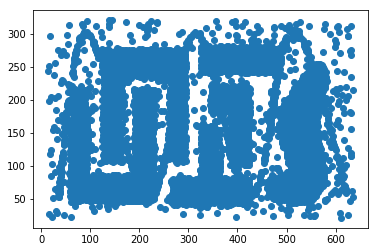

In [10]:
plt.scatter(data1[:, 0], data1[:, 1])


In [56]:
kneighbors_graph(X_sim, 3, mode='connectivity', include_self= False).toarray()


array([[0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

In [57]:
X_Ksim = filtrage_simMatrix(X_sim,3)


In [58]:
print(X_Ksim)

[[0.         0.         0.01326947 0.         0.00416624 0.00915595]
 [0.         0.         0.         0.01203834 0.00373232 0.00278046]
 [0.01326947 0.         0.         0.         0.00424803 0.02667167]
 [0.         0.01203834 0.         0.         0.00436448 0.0035881 ]
 [0.00416624 0.         0.00424803 0.00436448 0.         0.        ]
 [0.00915595 0.         0.02667167 0.         0.00389552 0.        ]]


In [59]:
# test
#simVoisin=filtrage_simMatrix(sim1,3)
#simVoisin
# NOTE : c'est anormalement longpour la matrice sur Simtot (8000 points...)

# Test DBScan sur X_Sim

# IMPORT DATA

#plt.plot(data3, pch=20)
clustering = DBSCAN(eps=10, min_samples=23, metric="precomputed").fit(X_Ksim)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
n_noise_ = list(labels).count(-1)
print('labels : ', labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
clustering
print(" eps : ", 0.1 , " min_samples : ", 5)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Silhouette Coefficient: %5f"% metrics.silhouette_score(X_sim, labels))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k,col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data1[0:100,:][class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy =data1[0:100,:][class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

labels :  [-1 -1 -1 -1 -1 -1]
 eps :  0.1  min_samples :  5
Estimated number of clusters: 0
Estimated number of noise points: 6


IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 6

In [88]:
#3. Créer le grape SNN
# pour générer le graphe SNN, il faut compter le nombre de voisins en commun puis mettre le poids
    # l'algo se trouve p11 de ce pdf : https://pdfs.semanticscholar.org/fc0a/31e27925b62cf5931aab23995644d4d6dd3e.pdf
    
def SNNmatrix(nnmatrix, k):
    snnmatrix= np.zeros((len(nnmatrix), len(nnmatrix)))
    for i in range(len(nnmatrix)):
        for j in range(len(nnmatrix)):
            # on ne considère pas le sommet lui-même
            # on considère que j est dans les plus proches voisins de i
            # on considère que i est dans les plus proches voisins de j
            if (i!=j) & (nnmatrix[i][j]!=0)& (nnmatrix[j][i]!=0):
                for l in range(len(nnmatrix)):
                    m= nnmatrix[i][l]
                    n= nnmatrix[l][j]
                    # on regarde si l est lié à i et à j et que l est différent de i et j
                    if (l!=i) & (l!=j)&(m!=0) & (n!=0):
                        snnmatrix[i][j]=snnmatrix[i][j]+1
                        # Version pondérée :
                        #snnmatrix[i][j]=snnmatrix[i][j]+(k+1-m)*(k+1-n)
    return snnmatrix

#((k+1-m)*(k+1-n))
# TODO : testé, mais ça ne donne pas le bon résultat.
# A Débuguer sur un exemple

In [96]:
print(X_Ksim)
snn=SNNmatrix(X_Ksim,3)
print(snn)
print(data1[0:6,:])
#print(snn.dot([1,1,1,1,1,1]))

[[0.         0.         0.01326947 0.         0.00416624 0.00915595]
 [0.         0.         0.         0.01203834 0.00373232 0.00278046]
 [0.01326947 0.         0.         0.         0.00424803 0.02667167]
 [0.         0.01203834 0.         0.         0.00436448 0.0035881 ]
 [0.00416624 0.         0.00424803 0.00436448 0.         0.        ]
 [0.00915595 0.         0.02667167 0.         0.00389552 0.        ]]
[[0. 0. 2. 0. 2. 1.]
 [0. 0. 0. 1. 0. 0.]
 [2. 0. 0. 0. 2. 1.]
 [0. 0. 0. 0. 2. 0.]
 [1. 0. 1. 0. 0. 0.]
 [2. 0. 2. 0. 0. 0.]]
[[ 68.601997 102.491997]
 [454.665985 264.80899 ]
 [101.283997 169.285995]
 [372.61499  263.140991]
 [300.989014  46.555   ]
 [100.904999 205.776993]]


In [93]:
# 
dataprint=data1[0:6,:]
for i in range(6):
    for j in range(6):
        if snn[i][j]==0:
            dataprint[i]=0
            
print(dataprint)
#4. Appliquer le principe de DBSCAN
# J'ai pas trop saisi coment faire ...

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
